In [32]:
from pyspark.sql import SparkSession
spark=(SparkSession.builder.appName("ML_PIPELINE")\
       .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
       .enableHiveSupport().getOrCreate())

In [33]:
spark

In [34]:
##question no 1-A list showing employee number, last name, first name, sex, and salary for each employee


spark.sql("select s.emp_no, e.last_name, e.first_name, e.sex, s.salary from employees as e inner join salaries as s on s.emp_no = e.emp_no order by s.emp_no").show()

+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

In [116]:
##question 2-- A list showing first name, last name, and hire date for employees who were hired in 1986.


spark.sql("SELECT  last_name, first_name, hire_date  FROM employees WHERE hire_date LIKE '%1986%'").show()


+------------+----------+----------+
|   last_name|first_name| hire_date|
+------------+----------+----------+
|     Facello|    Georgi| 6/26/1986|
|     Bamford|     Parto| 8/28/1986|
|     Koblick| Chirstian| 12/1/1986|
|    Zschoche|    Sanjiv|  2/4/1986|
|    Schusler|      Kwee| 2/26/1986|
|        Gils|   Kshitij| 3/27/1986|
|       Rosen|  Zhongwei|10/30/1986|
|     Eugenio|   Xinglin|  9/8/1986|
|Flasterstein| Sudharsan| 8/12/1986|
|     Hofting|    Kendra| 3/14/1986|
|      Morton|    Hilari| 7/15/1986|
|       Birch|     Akemi| 12/2/1986|
|      Giveon|    Lunjin| 10/2/1986|
|      Ullian|    Xuejia| 8/22/1986|
|    Rissland|   Chikara| 1/23/1986|
|    Peltason|  Domenick| 3/14/1986|
|    Pintelas|    Zissis| 2/11/1986|
|   Shimshoni|     Perry| 9/18/1986|
| Encarnacion|  Kazuhito| 8/21/1986|
|       Perry|   Xiadong| 11/5/1986|
+------------+----------+----------+
only showing top 20 rows



In [36]:
##question 3--A list showing the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

spark.sql("select departments.dept_no,departments.dept_name,dept_manager.emp_no,employees.first_name, employees.last_name from departments inner join dept_manager on departments.dept_no=dept_manager.dept_no  inner join employees on employees.emp_no=dept_manager.emp_no").show()



+-------+--------------------+------+-----------+------------+
|dept_no|           dept_name|emp_no| first_name|   last_name|
+-------+--------------------+------+-----------+------------+
|   d001|         "Marketing"|110022|  Margareta|  Markovitch|
|   d001|         "Marketing"|110039|   Vishwani|    Minakawa|
|   d002|           "Finance"|110085|       Ebru|       Alpin|
|   d002|           "Finance"|110114|      Isamu|  Legleitner|
|   d003|   "Human Resources"|110183|    Shirish|Ossenbruggen|
|   d003|   "Human Resources"|110228|    Karsten|     Sigstam|
|   d004|        "Production"|110303|  Krassimir|     Wegerle|
|   d004|        "Production"|110344|     Rosine|       Cools|
|   d004|        "Production"|110386|       Shem|      Kieras|
|   d004|        "Production"|110420|      Oscar|    Ghazalie|
|   d005|       "development"|110511|   DeForest|    Hagimont|
|   d005|       "development"|110567|       Leon|    DasSarma|
|   d006|"Quality Management"|110725|  Peternela|     O

In [37]:
##4--A list showing the department of each employee with the following information: employee number, last name, first  name, and department name.


spark.sql("select departments.dept_name,dept_manager.emp_no,employees.first_name, employees.last_name from departments inner join dept_manager on departments.dept_no=dept_manager.dept_no  inner join employees on employees.emp_no=dept_manager.emp_no").show()



+--------------------+------+-----------+------------+
|           dept_name|emp_no| first_name|   last_name|
+--------------------+------+-----------+------------+
|         "Marketing"|110022|  Margareta|  Markovitch|
|         "Marketing"|110039|   Vishwani|    Minakawa|
|           "Finance"|110085|       Ebru|       Alpin|
|           "Finance"|110114|      Isamu|  Legleitner|
|   "Human Resources"|110183|    Shirish|Ossenbruggen|
|   "Human Resources"|110228|    Karsten|     Sigstam|
|        "Production"|110303|  Krassimir|     Wegerle|
|        "Production"|110344|     Rosine|       Cools|
|        "Production"|110386|       Shem|      Kieras|
|        "Production"|110420|      Oscar|    Ghazalie|
|       "development"|110511|   DeForest|    Hagimont|
|       "development"|110567|       Leon|    DasSarma|
|"Quality Management"|110725|  Peternela|     Onuegbe|
|"Quality Management"|110765|     Rutger|     Hofmeyr|
|"Quality Management"|110800|     Sanjoy|     Quadeer|
|"Quality 

In [38]:
##5- A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

spark.sql(" SELECT employees.first_name,employees.last_name,employees.sex from employees where employees.first_name = 'Hercules' and employees.last_name like 'B%' ").show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|   Benzmuller|  M|
|  Hercules|      Brendel|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baer|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|      Basagni|  M|
|  Hercules|        Biran|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Bisiani|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|        Biron|  F|
|  Hercules|      Buchter|  M|
|  Hercules|         Bain|  F|
|  Hercules|         Bahr|  M|
|  Hercules|         Baak|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Berstel|  F|
+----------+-------------+---+



In [39]:
##question -6- A list showing all employees in the Sales department, including their employee number, last name, first name, and  department name.

spark.sql("select employees.emp_no,employees.first_name,employees.last_name, departments.dept_name from employees left join dept_emp on  employees.emp_no=dept_emp.emp_no left join departments on departments.dept_no=dept_emp.dept_no where departments.dept_name like '%Sales%' ").show()

+------+----------+------------+---------+
|emp_no|first_name|   last_name|dept_name|
+------+----------+------------+---------+
| 10002|   Bezalel|      Simmel|  "Sales"|
| 10016|  Kazuhito| Cappelletti|  "Sales"|
| 10034|     Bader|        Swan|  "Sales"|
| 10041|       Uri|      Lenart|  "Sales"|
| 10050|   Yinghua|      Dredge|  "Sales"|
| 10053|    Sanjiv|    Zschoche|  "Sales"|
| 10060|  Breannda| Billingsley|  "Sales"|
| 10061|       Tse|      Herber|  "Sales"|
| 10068|  Charlene|     Brattka|  "Sales"|
| 10087|   Xinglin|     Eugenio|  "Sales"|
| 10088|  Jungsoon|    Syrzycki|  "Sales"|
| 10089| Sudharsan|Flasterstein|  "Sales"|
| 10093|   Sailaja|     Desikan|  "Sales"|
| 10095|    Hilari|      Morton|  "Sales"|
| 10099|    Valter|     Sullins|  "Sales"|
| 10101|     Perla|      Heyers|  "Sales"|
| 10107|      Dung|        Baca|  "Sales"|
| 10125|     Syozo|     Hiltgen|  "Sales"|
| 10136|    Zissis|    Pintelas|  "Sales"|
| 10148|    Douadi|       Azumi|  "Sales"|
+------+---

In [40]:
##q7-A list showing all employees in the Sales and Development departments, including their employee number, last name,  first name, and department name.

spark.sql("select employees.emp_no,employees.first_name,employees.last_name,departments.dept_name from employees left join dept_emp on employees.emp_no=dept_emp.emp_no left join departments on departments.dept_no=dept_emp.dept_no where departments.dept_name like '%Sales%' or departments.dept_name like'%development%'").show()

+------+----------+-----------+-------------+
|emp_no|first_name|  last_name|    dept_name|
+------+----------+-----------+-------------+
| 10001|    Georgi|    Facello|"development"|
| 10002|   Bezalel|     Simmel|      "Sales"|
| 10006|    Anneke|    Preusig|"development"|
| 10008|    Saniya|   Kalloufi|"development"|
| 10012|  Patricio|  Bridgland|"development"|
| 10014|     Berni|      Genin|"development"|
| 10016|  Kazuhito|Cappelletti|      "Sales"|
| 10018|  Kazuhide|       Peha|"development"|
| 10021|     Ramzi|       Erde|"development"|
| 10022|    Shahaf|     Famili|"development"|
| 10023|     Bojan| Montemayor|"development"|
| 10025| Prasadram|     Heyers|"development"|
| 10027|    Divier|    Reistad|"development"|
| 10028|  Domenick|   Tempesti|"development"|
| 10031|   Karsten|     Joslin|"development"|
| 10034|     Bader|       Swan|      "Sales"|
| 10037|   Pradeep|   Makrucki|"development"|
| 10040|     Weiyi|    Meriste|"development"|
| 10041|       Uri|     Lenart|   

In [41]:
##question-8-A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each  last name

spark.sql(" select employees.last_name,count(last_name) as cnt from employees GROUP BY last_name order by cnt desc ").show()


+-----------+---+
|  last_name|cnt|
+-----------+---+
|       Baba|226|
|     Gelosh|223|
|      Coorg|223|
|    Sudbeck|222|
|     Farris|222|
|     Adachi|221|
|     Osgood|220|
|     Masada|218|
|     Neiman|218|
|    Mandell|218|
|    Wendorf|217|
|Boudaillier|217|
|     Pettis|216|
|   Cummings|216|
|    Solares|216|
|     Mahnke|216|
|    Kulisch|215|
| Maksimenko|215|
|   Collette|215|
|   Birjandi|215|
+-----------+---+
only showing top 20 rows



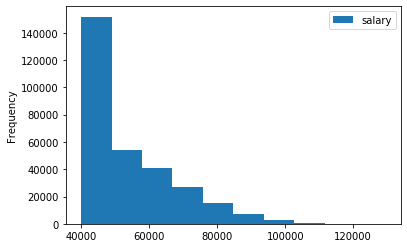

In [66]:
##9-Histogram to show the salary distribution among the employees--
import matplotlib.pyplot as plt
import pandas as pd
histo=spark.sql("select titles.title,salaries.salary from employees join titles on employees.emp_titles_id=titles.title_id join salaries on salaries.emp_no=employees.emp_no")
histo1=histo.toPandas()
histo1.plot(kind="hist")

In [71]:
##10--Bar graph to show the Average salary per title (designation)


title=spark.sql("select avg(salaries.salary),titles.title from employees join titles on employees.emp_titles_id=titles.title_id join salaries on salaries.emp_no=employees.emp_no group by titles.title").toPandas()

In [74]:
title.columns

Index(['avg(salary)', 'title'], dtype='object')

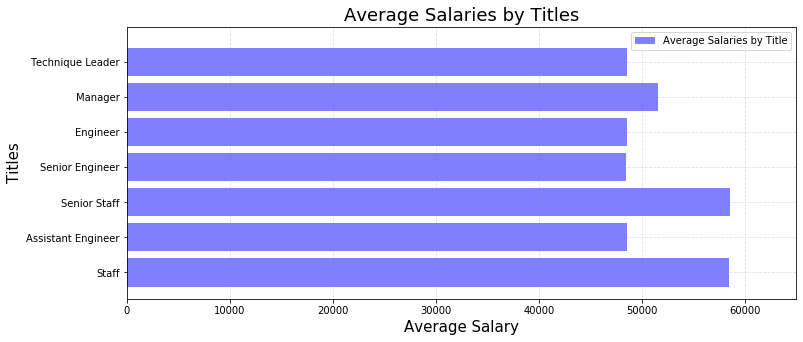

In [82]:
import numpy as np
x_axis= np.arange(len(title))
y_axis = title["avg(salary)"]
plt.figure(figsize=(12,5))
bar_chart = plt.barh(x_axis, y_axis, color = 'b', alpha= 0.5, align='center', label='Average Salaries by Title') 
plt.xlim(0,65000)
plt.ylim(-0.75,7)
plt.title('Average Salaries by Titles', fontsize=18)
plt.xlabel("Average Salary", fontsize=15)
plt.ylabel("Titles", fontsize=15)
plt.legend(loc='best')

tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, title['title'], rotation="horizontal")
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.show()

In [85]:
salaries_freq_df=spark.sql("select salary from salaries")

In [88]:
salaries_freq_df.show()

+------+
|salary|
+------+
| 60117|
| 65828|
| 40006|
| 40054|
| 78228|
| 40000|
| 56724|
| 46671|
| 60929|
| 72488|
| 42365|
| 40000|
| 40000|
| 46168|
| 40000|
| 70889|
| 71380|
| 55881|
| 44276|
| 40000|
+------+
only showing top 20 rows



In [97]:
###SQL to see the top 10 most common salary for employees
salaries_freg_df2=spark.sql("select count(salary) as no_of_employees,salary from salaries group by salary order by count(salary) desc limit 10")

In [98]:
salaries_freg_df2.show()

+---------------+------+
|no_of_employees|salary|
+---------------+------+
|          95346| 40000|
|             19| 55581|
|             18| 53078|
|             18| 53738|
|             17| 44564|
|             17| 45184|
|             17| 47454|
|             16| 53783|
|             16| 43710|
|             16| 45050|
+---------------+------+



In [113]:
##SQL to get average salary for each job title

salaries_avg_title_df=spark.sql("select avg(salary) as avg_salary,title from salaries inner join employees on employees.emp_no=salaries.emp_no inner join titles on titles.title_id=employees.emp_titles_id group by title").show()

+------------------+------------------+
|        avg_salary|             title|
+------------------+------------------+
| 58465.38285033152|             Staff|
| 48564.43444730077|Assistant Engineer|
| 58550.17270435993|      Senior Staff|
| 48506.79987109579|   Senior Engineer|
|48535.336511426336|          Engineer|
|51531.041666666664|           Manager|
| 48582.89609189332|  Technique Leader|
+------------------+------------------+

